In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
#preprocessing
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df['RiskLevel'].replace({"high risk": "2", "mid risk": "1", "low risk" : "0"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
#df with duplicates
dfwd = df.copy()
#df of only duplicates
dfd = df.loc[df.duplicated(),:]
# df without duplicates
dfwnd = df.drop_duplicates()
from sklearn.model_selection import train_test_split
X_values = df.drop('RiskLevel', axis=1)
y_values = df['RiskLevel']

# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)

X_train,X_test,y_train,y_test = train_test_split(X_values,y_values,
                                                 test_size=0.25,random_state= 42)
X_train.shape,X_test.shape, y_train.shape


((760, 6), (254, 6), (760,))

In [3]:
# Modelling
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape = [6], activation='relu'),
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 126)               32382     
                                                                 
 dense_2 (Dense)             (None, 3)                 381       
                                                                 
Total params: 34,555
Trainable params: 34,555
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
24/24 [==============================] - 2s 29ms/step - loss: 1.0385 - accuracy: 0.5447 - val_loss: 0.9755 - val_accuracy: 0.6102
Epoch 2/500
24/24 [==============================] - 0s 11ms/step - loss: 0.9253 - accuracy: 0.5882 - val_loss: 0.8809 - val_accuracy: 0.5669
Epoch 3/500
24/24 [==============================] - 0s 10ms/step - loss: 0.8402 - accuracy: 0.6276 - val_loss: 0.8335 - val_accuracy: 0.6102
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 0.8102 - accuracy: 0.6434 - val_loss: 0.8289 - val_accuracy: 0.5630
Epoch 5/500
24/24 [==============================] - 0s 11ms/step - loss: 0.7952 - accuracy: 0.6447 - val_loss: 0.7906 - val_accuracy: 0.6142
Epoch 6/500
24/24 [==============================] - 0s 12ms/step - loss: 0.7896 - accuracy: 0.6237 - val_loss: 0.7956 - val_accuracy: 0.6024
Epoch 7/500
24/24 [==============================] - 0s 9ms/step - loss: 0.7739 - accuracy: 0.6513 - val_loss: 0.7884 - val_accuracy: 0.6220
Epoch 8/

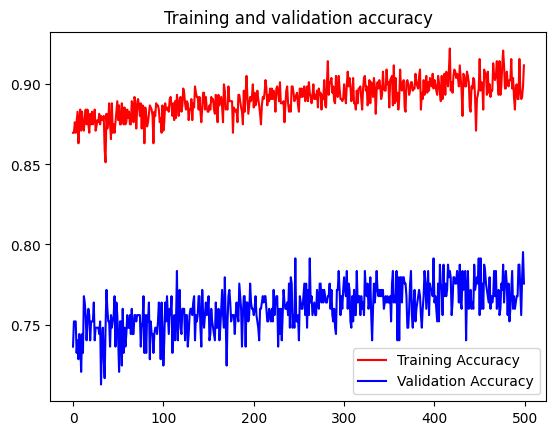

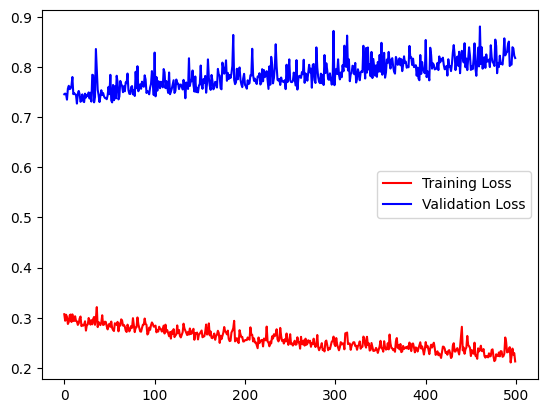

In [13]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label ="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 126)               32382     
                                                                 
 dense_2 (Dense)             (None, 3)                 381       
                                                                 
Total params: 34,555
Trainable params: 34,555
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
24/24 [==============================] - 2s 23ms/step - loss: 0.2522 - accuracy: 0.8882 - val_loss: 0.8586 - val_accuracy: 0.7520
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 0.2464 - accuracy: 0.8947 - val_loss: 0.8490 - val_accuracy: 0.7559
Epoch 3/500
24/24 [=========

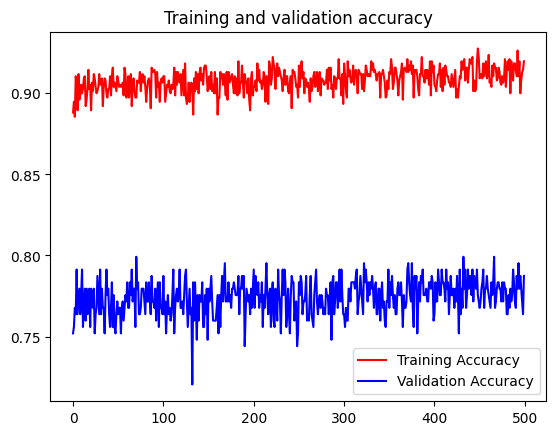

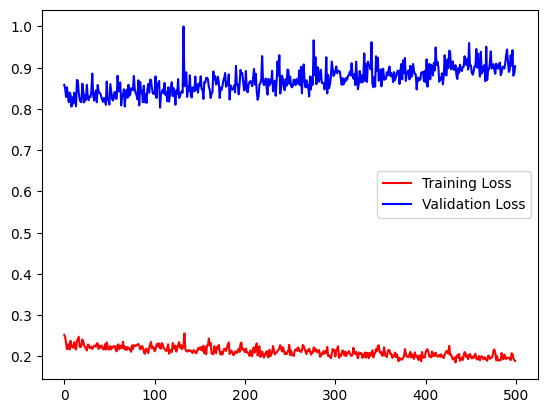

In [14]:
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=[None, 6]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label ="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend()
plt.show()